In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

<Axes: xlabel='price', ylabel='Count'>

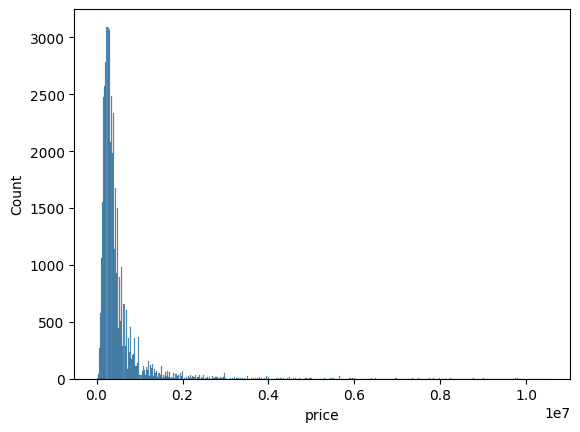

In [25]:
# yes, to improve
properties_with_outliers = pd.read_csv('cleaned_data_with_outliers.csv')
sns.histplot(data=properties_with_outliers, x="price")

Max price in raw data: 10500000.0
           price  count
2673  10500000.0      1


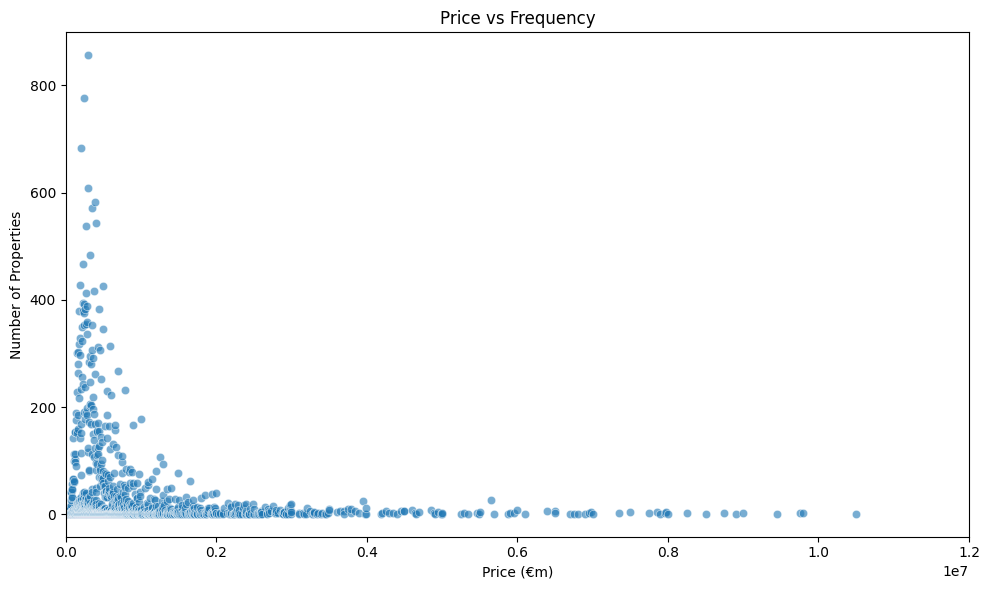

In [46]:
# yes, to improve - SOFIA - Scatter of price
properties_with_outliers = pd.read_csv('cleaned_data_with_outliers.csv')

print("Max price in raw data:", properties_with_outliers['price'].max())

properties_with_outliers['price'] = pd.to_numeric(properties_with_outliers['price'], errors='coerce')
properties_with_outliers = properties_with_outliers.dropna(subset=['price'])
price_counts = (
    properties_with_outliers
      .groupby('price')
      .size()
      .reset_index(name='count')
)

print(price_counts[price_counts['price'] > 10_000_000])
plt.figure(figsize=(10, 6))
sns.scatterplot(data=price_counts, x='price', y='count', alpha=0.6)
plt.xlim(0, 12_000_000)

plt.xlabel("Price (€m)")
plt.ylabel("Number of Properties")
plt.title("Price vs Frequency")

plt.tight_layout()
plt.show()

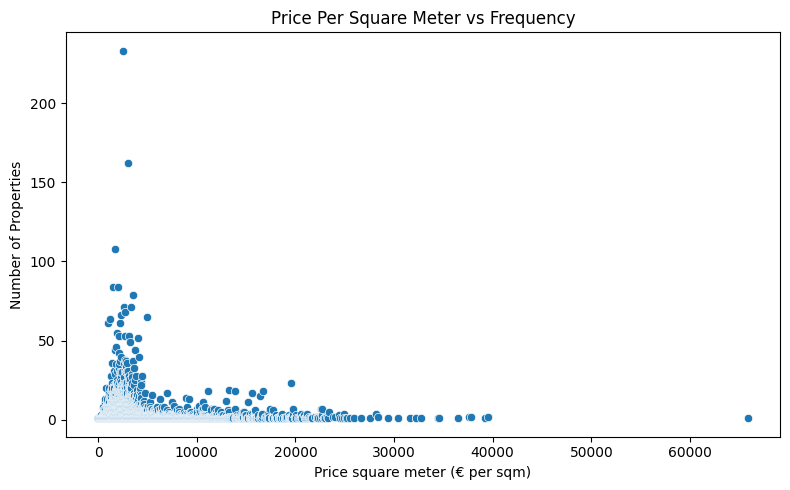

In [27]:
# yes, to improve - SOFIA  Scatter of price per square meter
properties_with_outliers = pd.read_csv('cleaned_data_with_outliers.csv')
price_counts = (
    properties_with_outliers
    .groupby('price_square_meter')           # group rows by each unique price
    .size()                     # count how many rows per price
    .reset_index(name='count')  # turn it into a DataFrame with columns ['price','count']
)

# 3) Plot scatter of price vs. count
plt.figure(figsize=(8,5))
sns.scatterplot(data=price_counts, x='price_square_meter', y='count')
plt.xlabel("Price square meter (€ per sqm)")
plt.ylabel("Number of Properties")
plt.title("Price Per Square Meter vs Frequency")
plt.tight_layout()
plt.show()

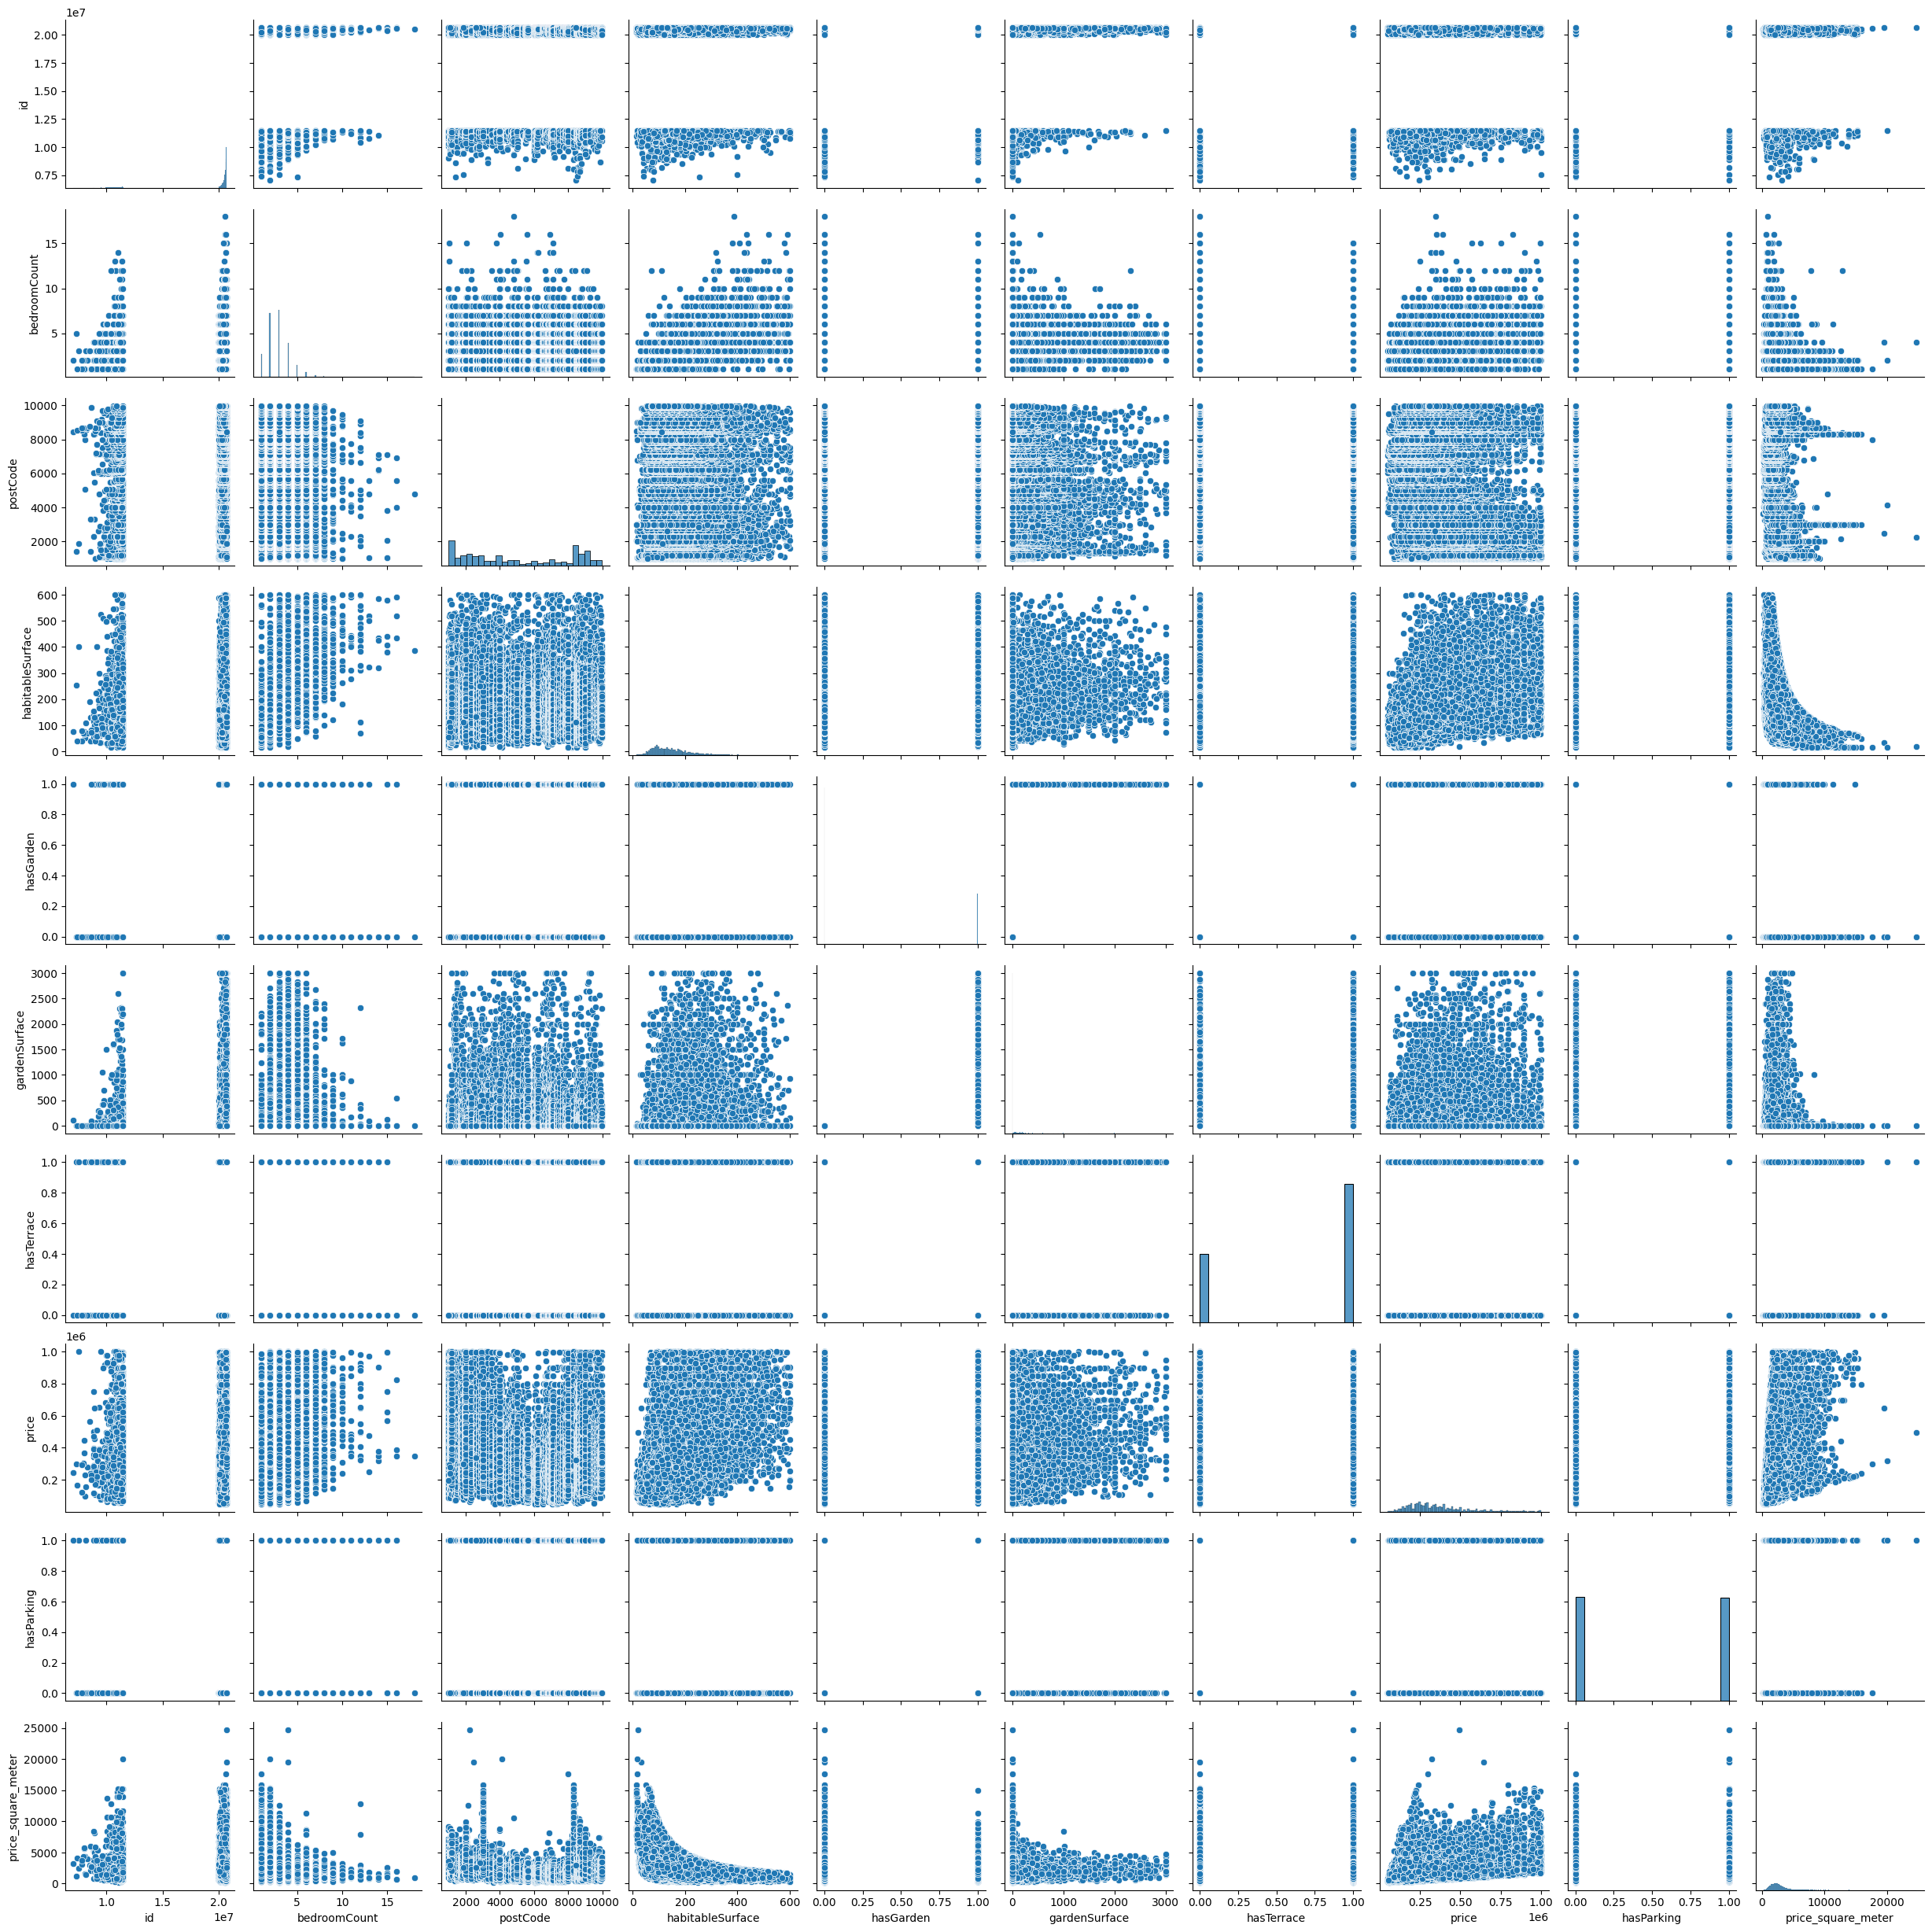

In [16]:
# No
properties = pd.read_csv("cleaned_data.csv")
sns.pairplot(data=properties)
plt.show()

<Axes: xlabel='price', ylabel='bedroomCount'>

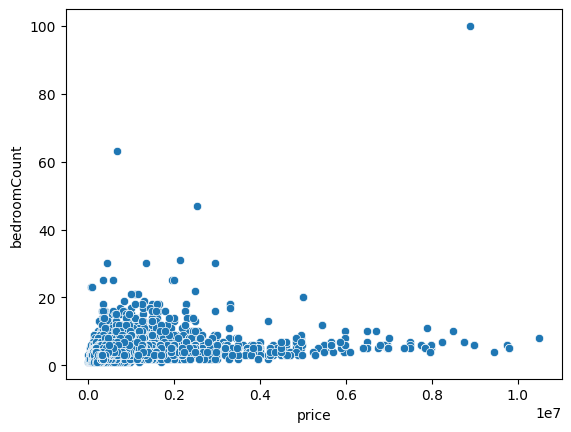

In [21]:
# yes, explain outliers
sns.scatterplot(data=properties_with_outliers, x="price", y="bedroomCount")

<Axes: xlabel='price', ylabel='Count'>

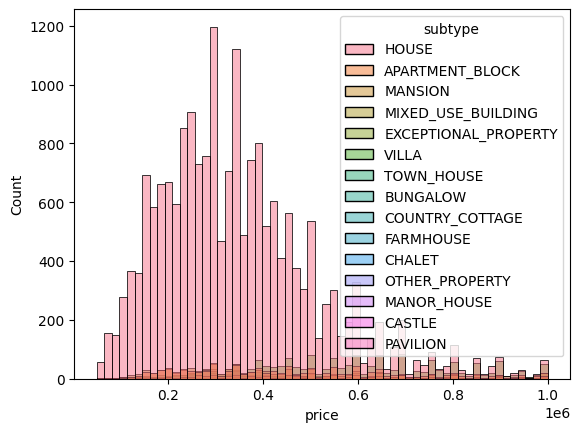

In [ ]:
# yes
houses = properties[properties["type"].isin(["HOUSE"])]
sns.histplot(data=houses, x="price", hue="subtype")

In [19]:
houses = properties[(properties["type"] == "HOUSE") & (properties["subtype"] != "HOUSE")]

<Axes: xlabel='price', ylabel='Count'>

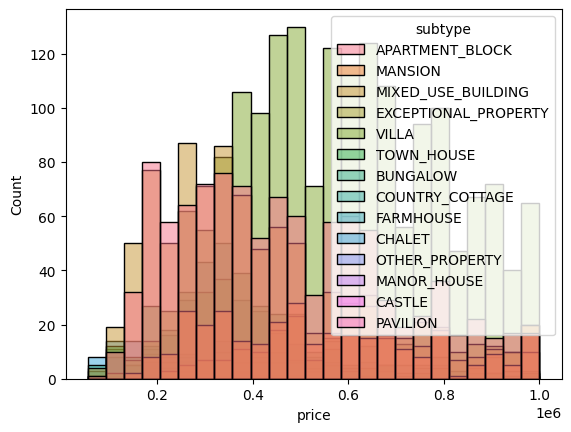

In [ ]:
# No
houses_no_subtypes = houses[(houses["subtype"] != "HOUSE")]
sns.histplot(data=houses_no_subtypes, x="price", hue="subtype")

<Axes: xlabel='price', ylabel='Count'>

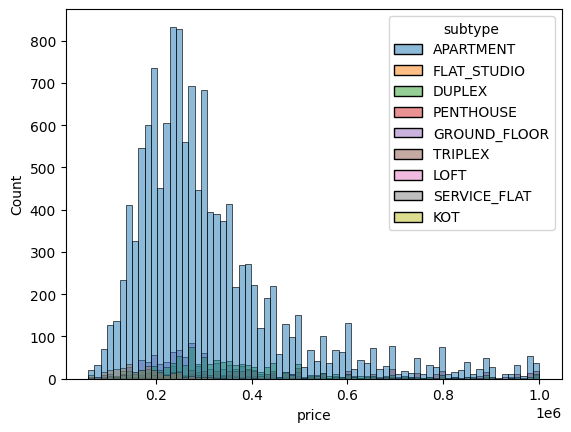

In [ ]:
# no
apartments = properties[properties["type"].isin(["APARTMENT"])]
sns.histplot(data=apartments, x="price", hue="subtype")

<Axes: xlabel='price', ylabel='Count'>

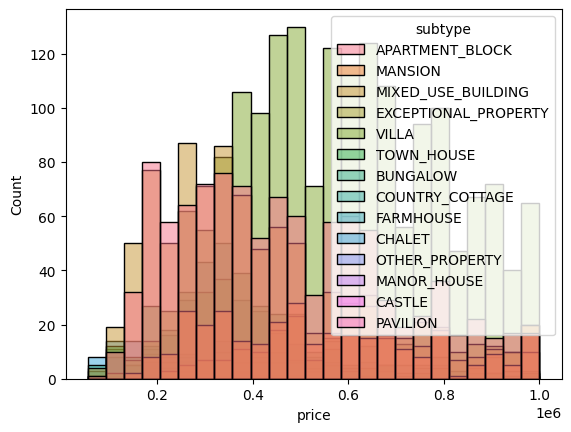

In [ ]:
# no
apartments_no_subtypes = apartments[(apartments["subtype"] != "APARTMENT")]
sns.histplot(data=houses_no_subtypes, x="price", hue="subtype")

<Axes: xlabel='habitableSurface', ylabel='price'>

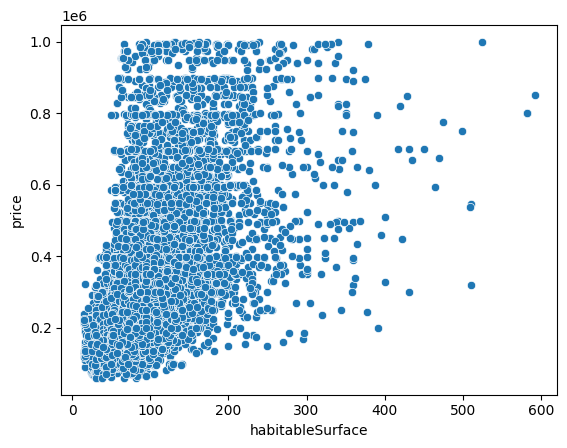

In [ ]:
# no
sns.scatterplot(data=apartments, x="habitableSurface", y="price" )

<Axes: xlabel='habitableSurface', ylabel='price'>

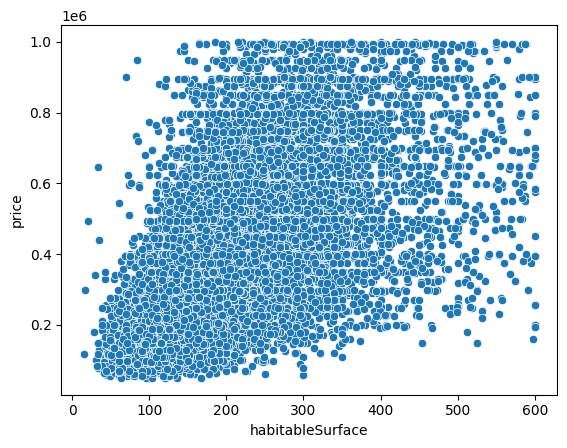

In [ ]:
# no
sns.scatterplot(data=houses, x="habitableSurface", y='price')

<Axes: xlabel='Count', ylabel='price'>

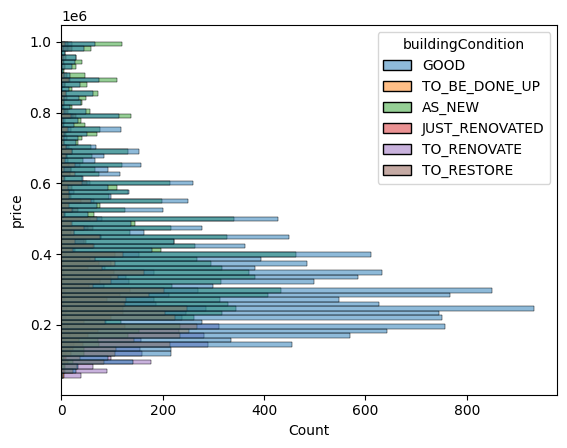

In [ ]:
# no
sns.histplot(data=properties, y="price", hue="buildingCondition")
 

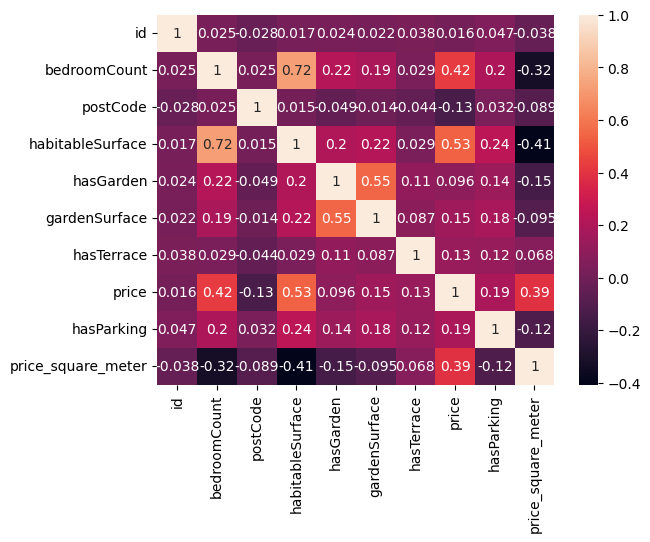

In [ ]:
# yes, but check cat heatmap and pick one
sns.heatmap(properties.select_dtypes(include='number').corr(), annot=True)
plt.show()

<Axes: xlabel='bedroomCount', ylabel='habitableSurface'>

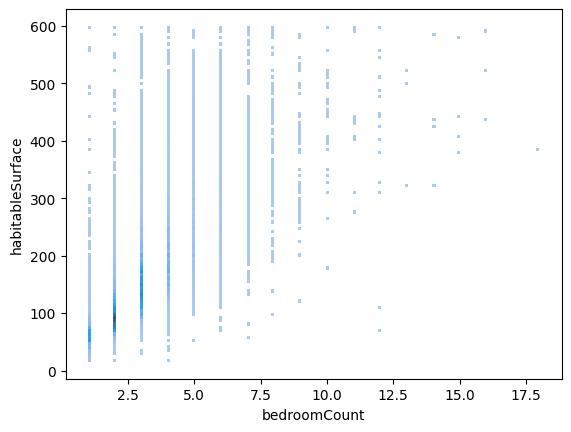

In [ ]:
# no
sns.histplot(data=properties, y="habitableSurface", x="bedroomCount")

In [10]:

df = pd.read_csv("cleaned_data.csv")
print(df.info(type))
print(df.dtypes.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41726 entries, 0 to 41725
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     41726 non-null  float64
 1   url                    41726 non-null  object 
 2   type                   41726 non-null  object 
 3   subtype                41726 non-null  object 
 4   bedroomCount           41726 non-null  float64
 5   province               41726 non-null  object 
 6   locality               41726 non-null  object 
 7   postCode               41726 non-null  int64  
 8   habitableSurface       41726 non-null  float64
 9   buildingCondition      41726 non-null  object 
 10  hasGarden              41726 non-null  int64  
 11  gardenSurface          41726 non-null  float64
 12  hasTerrace             41726 non-null  int64  
 13  epcScore               41726 non-null  object 
 14  price                  41726 non-null  float64
 15  ha